In [1]:
#Depression Detection
#import the necessary modules

import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D
import os
import matplotlib.image as img
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import imghdr
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import numpy as np

C:\Users\princ\AppData\Local\Temp\ipykernel_29408\1671323282.py:13: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
#define the base directory from where the images are iterated

data_dir = "D:\Depress"

In [3]:
#preprocessing(remove the images that do not belong to the defined extensions)

image_exts = ['jpeg','jpg', 'bmp', 'png']
num_obs = [0,0]
class_idx = -1
for image_class in os.listdir(data_dir):
    class_idx = class_idx + 1
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
            else:
                num_obs[class_idx] = num_obs[class_idx] + 1
        except Exception as e: 
            print('Issue with image {}: {}'.format(image_path, str(e)))

In [4]:
#displaying the no of image files and the no of classes

data = keras.utils.image_dataset_from_directory(data_dir)

Found 9964 files belonging to 2 classes.


In [5]:
#scaling and Labelling

scale = ImageDataGenerator(rescale=1./255) 

x = scale.flow_from_directory(
    data_dir,
    target_size=(48, 48),
    batch_size=65,
    class_mode='binary')

Found 9964 images belonging to 2 classes.


In [6]:
# callback function to stop when the necessary condition is achieved

class Callback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') >= 0.99:  
            print("\nHurrah! We reached the goal. So sorry to say that its time to stop.")
            self.model.stop_training = True

In [14]:
#training the images using CNN

model = Sequential()

model.add(Conv2D(32,(3,3), activation = "relu", input_shape = (48,48,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3), activation = "relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3), activation = "relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3), activation = "relu"))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation = "relu"))
model.add(Dense(1,activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

callbacks = Callback()

history = model.fit(x,epochs = 100,callbacks = [callbacks])

history

Epoch 1/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5063 - loss: 0.6937
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.5220 - loss: 0.6926
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.5876 - loss: 0.6698
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.6323 - loss: 0.6440
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.6546 - loss: 0.6233
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.6694 - loss: 0.6083
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.6829 - loss: 0.5970
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6965 - loss: 0.5825
Epoch 9/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.7010 - loss: 0.5702
Epoch 10/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.7017 - loss: 0.5691
Epoch 11/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.7250 - loss: 0.5461
Epoch 12/100
154/154 ━━━━━━━━━

In [15]:
# Can check how the model is using layers on the images

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 46, 46, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 21, 21, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 8, 8, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 2, 2, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92,453 (361.15 KB)

 Trainable params: 30,817 (120.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,636 (240.77 KB)

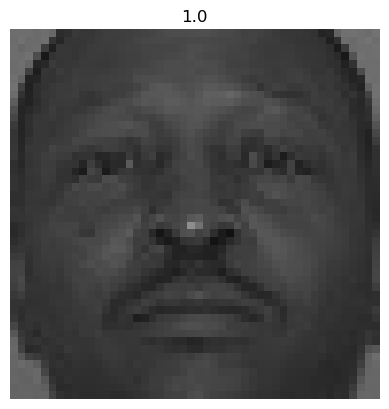

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Happy


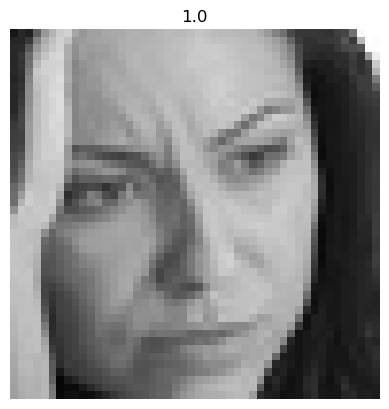

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Happy


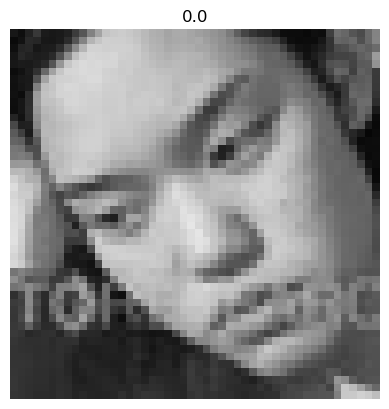

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Sad


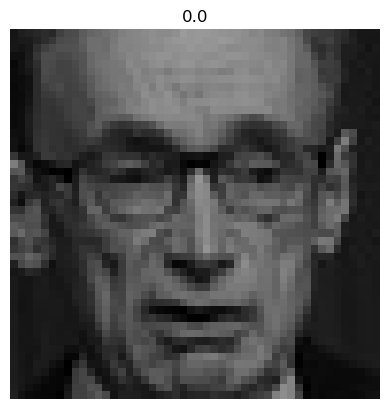

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Sad


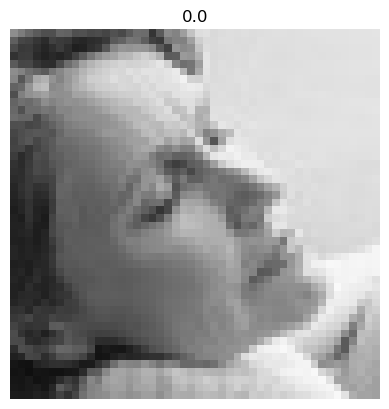

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Sad


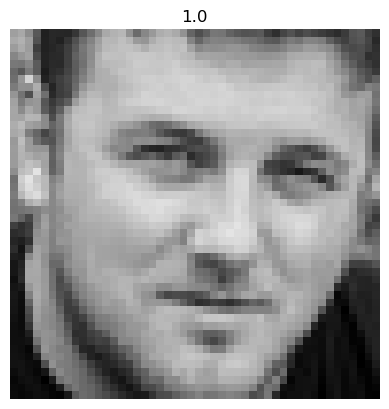

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Happy


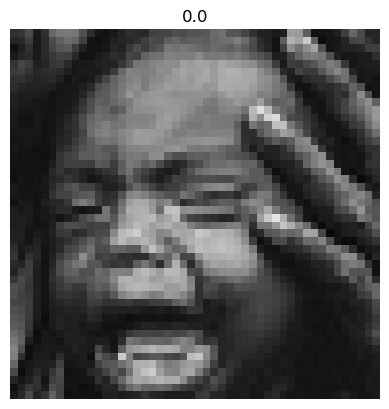

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Sad


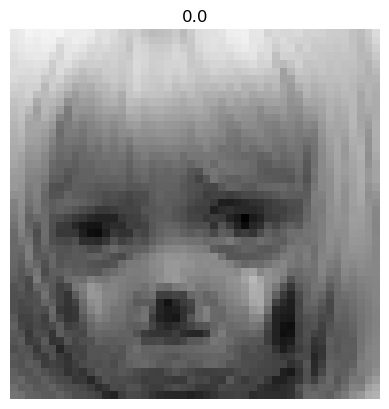

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Sad


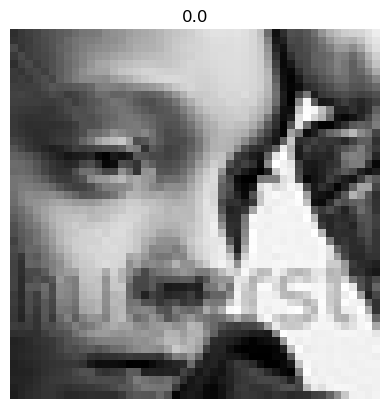

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Sad


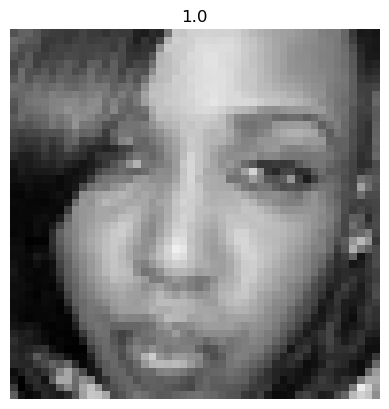

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Happy


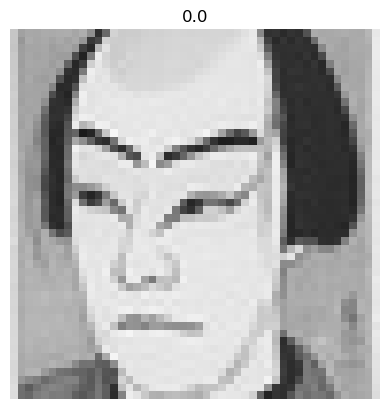

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Sad


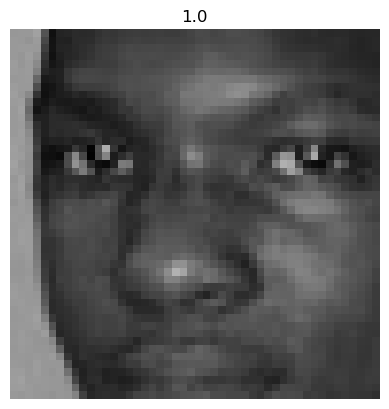

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Happy


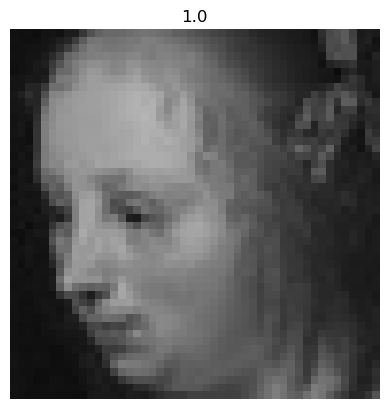

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Happy


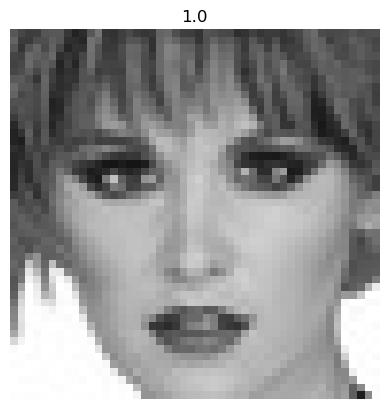

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Happy


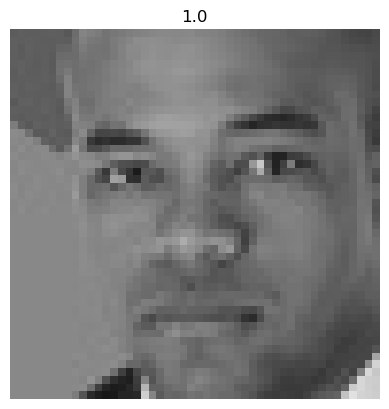

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Happy


In [30]:
#Set the index so that you can set ur own to predict the images
#As the images are stored in a contiguous memory you can use the next function to iterate
#display the image and do the classification based on the sigmoid output

pre = []
index = 0
batch_size = 15
for i in range(batch_size):
    batches = next(x)
    images, labels = batches
    image = images[index]
    label = labels[index]
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')
    plt.show()
    image = image.reshape(1, 48, 48, 3)
    y = model.predict(image)
    if y > 0.5:
        la = "Happy"
    else:
        la = "Sad"
    print(la)

In [ ]:
lala = []
batch_size1 = 9964
for i in range(batch_size1):
    batches = next(x)
    images, labels = batches
    image = images[index]
    label = labels[index]
    image = image.reshape(1, 48, 48, 3)
    y = model.predict(image)
    if y > 0.5:
        la = 1
    else:
        la = 0
    print(la)
    lala.append(la)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1


In [39]:
len(lala)

9964

In [40]:
y_true = x.labels
len(y_true)

9964

In [41]:
# Evaluation metrics

precision = precision_score(y_true, lala)
recall = recall_score(y_true, lala)
conf_matrix = confusion_matrix(y_true, lala)

print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:", conf_matrix)

Precision: 0.5009027081243731
Recall: 0.5012043356081894
Confusion Matrix: [[2494 2488]
 [2485 2497]]


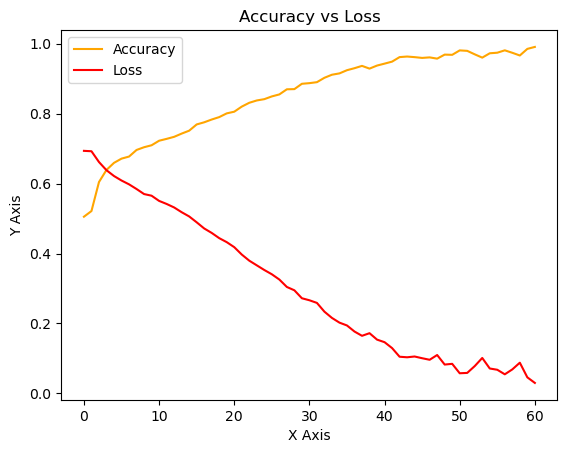

In [42]:
plt.plot(history.history["accuracy"], color="orange", label="Accuracy")
plt.plot(history.history["loss"], color="red", label="Loss")
plt.title('Accuracy vs Loss')
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.legend()
plt.show()

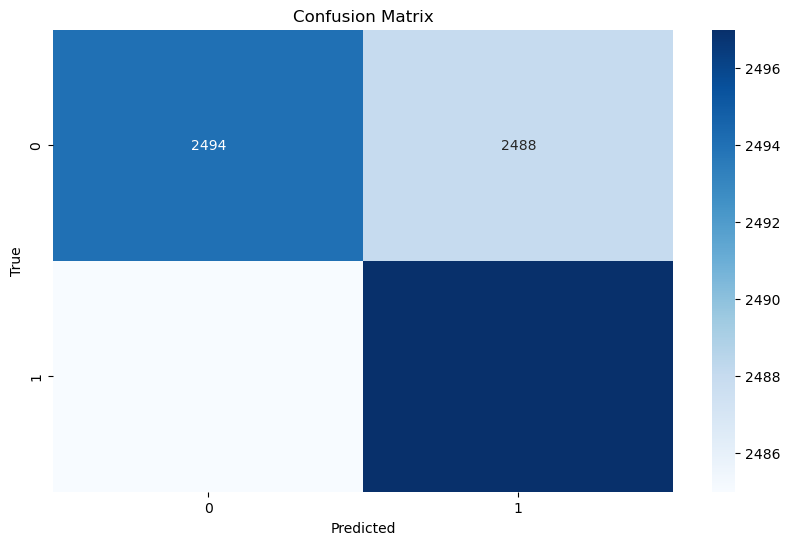

In [50]:
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()